# Problem Set-Up

In [21]:
%pylab inline

import matplotlib.pyplot as plt
from matplotlib import animation
from JSAnimation import IPython_display    
from IPython.display import HTML

Populating the interactive namespace from numpy and matplotlib


C:\Users\Ryan\anaconda3\lib\site-packages\IPython\core\magics\pylab.py:159: UserWarning: pylab import has clobbered these variables: ['time']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


In [22]:
# Perfect sensor
def sense(x):
    return x

In [23]:
def simulate(Δt, p, u):
    p += Δt * u
    return p

In [24]:
### Control policy for defined curve
def control(t, y):
    
    # Helix (control policy is the version found in our textbook: top of page 12)
    ux = cos(t)
    uy = sin(t)
    uz = (2*t)/(5*pi)
    
    return array([ux, uy, uz])

In [25]:
def animate(t):
    ax.clear()
    
    # Path
    plot(p_log[:,0], p_log[:,1], p_log[:,2], 'r--')
    
    # Initial conditions
    plot(p_log[t,0], p_log[t,1], p_log[t,2], 'bo')

# Question 3: Implementing 3D Control Policy (Helix)

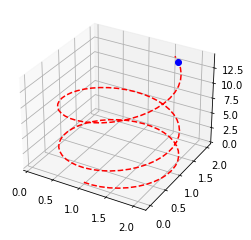

In [28]:
tf = 15    # Amount of time to simulate control
Δt = 0.15  # Time step
time = linspace(0.,tf, int(tf / Δt) + 1)  # Time interval

## Initial Conditions
p = array([cos(0), sin(0), (2*0)/(5*pi)]) #robot location (t=0)
p_log = [copy(p)]

## Update position array for each time (t)
for t in time:
    y = sense(p)
    # Desired point to achieve changes every time based on equation
    u = control(t, y)
    p = simulate(Δt, p, u)
    p_log.append(copy(p))
    
p_log = array(p_log)

## Plotting controls
fig = plt.figure()
ax = plt.axes(projection ='3d')
plot(p_log[:,0], p_log[:,1], p_log[:,2])

#fig, ax = plt.subplots() # uncomment & run this to get the actual static 3d plot figure, but will mess up the animation
anim = animation.FuncAnimation(fig, animate, frames=len(time), interval=60)
HTML(anim.to_jshtml())